In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf

import sys

from tensorflow.examples.tutorials.mnist import input_data

D:\Users\snandan.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.9.0
1.14.3
2.2.2


In [5]:
mnist = input_data.read_data_sets("mnist_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
tf.reset_default_graph()

In [7]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

In [8]:
def show_reconstructed_digits(X, outputs, model_path = None):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
    
        X_test = mnist.test.images[100 : 102]
        outputs_val = outputs.eval(feed_dict={X: X_test})
    
    fig = plt.figure(figsize=(8, 6))
    
    for i in range(2):
        plt.subplot(2, 2, i * 2 + 1)
        display_digit(X_test[i])
    
        plt.subplot(2, 2, i * 2 + 2)
        display_digit(outputs_val[i])

In [9]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

In [10]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

In [11]:
dropout_rate = 0.0

In [12]:
training = tf.placeholder_with_default(False, shape=(), name='training')

In [13]:
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

In [14]:
from functools import partial

dense_layer = partial(tf.layers.dense,
                      activation=tf.nn.relu)

hidden1 = dense_layer(X_drop, n_hidden1)
hidden2 = dense_layer(hidden1, n_hidden2)
hidden3 = dense_layer(hidden2, n_hidden3)

outputs = dense_layer(hidden3, n_outputs, activation=None)

In [15]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

In [16]:
optimizer = tf.train.AdamOptimizer(0.01)
training_op = optimizer.minimize(reconstruction_loss)

In [17]:
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [18]:
n_epochs = 12
batch_size = 100

In [19]:
with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size

        for iteration in range(n_batches):
            X_batch, _ = mnist.train.next_batch(batch_size)

            sess.run(training_op, feed_dict={X: X_batch, training: True})

        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   

        print("\r{}".format(epoch), "Train MSE:", loss_train)

        saver.save(sess, "./dropout_autoencoder.ckpt")        

0 Train MSE: 0.023410615
1 Train MSE: 0.021143885
2 Train MSE: 0.021825606
3 Train MSE: 0.019846983
4 Train MSE: 0.021864375
5 Train MSE: 0.019450534
6 Train MSE: 0.019665826
7 Train MSE: 0.019624
8 Train MSE: 0.020491429
9 Train MSE: 0.02035279
10 Train MSE: 0.019271506
11 Train MSE: 0.021276752


INFO:tensorflow:Restoring parameters from ./dropout_autoencoder.ckpt


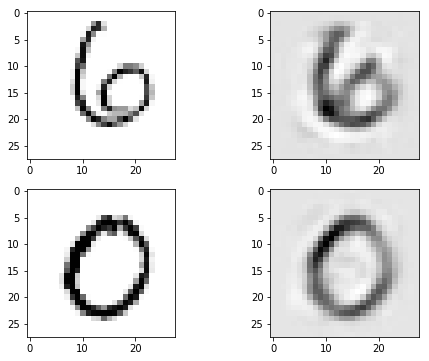

In [20]:
show_reconstructed_digits(X, outputs, "./dropout_autoencoder.ckpt")